In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import pickle
%matplotlib inline

In [11]:
import sklearn
print(sklearn.__version__)


1.6.1


In [12]:
df=pd.read_csv("datasets/dataset.csv")

In [13]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.shape

(4920, 18)

In [15]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [16]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [18]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [19]:
df = df.fillna("None")
df = df.drop_duplicates()
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Fungal infection,itching,skin_rash,dischromic _patches,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [20]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,304,304,304,304,304,304,304,304,304,304,304,304,304,304,304,304,304,304
unique,41,34,48,54,51,39,33,27,22,23,22,19,12,9,5,4,4,2
top,Hepatitis D,vomiting,vomiting,fatigue,None,None,None,None,None,None,None,None,None,None,None,None,None,None
freq,10,46,56,46,32,70,118,146,164,184,194,236,257,274,285,286,294,303


In [21]:
df["Symptom_1"].value_counts()

Symptom_1
 vomiting                       46
 fatigue                        45
itching                         41
 chills                         34
 joint_pain                     32
 skin_rash                      27
 continuous_sneezing            12
 acidity                        10
 headache                        7
 stomach_pain                    6
 constipation                    5
 muscle_weakness                 5
 back_pain                       5
 muscle_wasting                  4
 burning_micturition             4
 indigestion                     2
 yellowish_skin                  2
 mood_swings                     1
 stiff_neck                      1
 neck_pain                       1
 cramps                          1
 pus_filled_pimples              1
 bladder_discomfort              1
 weight_gain                     1
 weakness_in_limbs               1
 breathlessness                  1
 pain_during_bowel_movements     1
 chest_pain                      1
 cough    

In [22]:
df["Disease"].value_counts()

Disease
Hepatitis D                                10
Dengue                                     10
Chicken pox                                10
Migraine                                   10
Hepatitis B                                 9
Hypoglycemia                                9
Common Cold                                 9
Tuberculosis                                9
Hepatitis E                                 9
hepatitis A                                 9
Typhoid                                     9
Hyperthyroidism                             9
Jaundice                                    9
Diabetes                                    9
Pneumonia                                   9
Varicose veins                              8
Malaria                                     8
Hypothyroidism                              8
Alcoholic hepatitis                         8
Chronic cholestasis                         8
Osteoarthristis                             7
Bronchial Asthma          

In [23]:
# plt.figure(figsize=(30,30))

# sns.countplot(y="Symptom", data=df1, palette="Dark2")
# plt.title("Count of Symptom", fontsize=40)
# plt.yticks(rotation=30)
# plt.show()

In [24]:
# dfx=pd.DataFrame()
# dfx["Disease"]=df["Disease"]
dfx = pd.get_dummies(df, columns=df.columns[1:], prefix='', prefix_sep='')

from sklearn.preprocessing import LabelEncoder
if "None" in dfx.columns:
    dfx = dfx.drop(columns="None")
    
le = LabelEncoder()
label=df["Disease"]
label=le.fit_transform(label)
dfx["Disease"] = label

dfx = dfx.astype(int)

dfx.to_csv("datasets/processed_data.csv", index=False)
df.to_csv("datasets/dataset2.csv")  

dfx.head()

,Disease,acidity,back_pain,bladder_discomfort,breathlessness,burning_micturition,chest_pain,chills,constipation,continuous_sneezing,cough,cramps,fatigue,headache,high_fever,indigestion,joint_pain,mood_swings,muscle_wasting,muscle_weakness,neck_pain,pain_during_bowel_movements,patches_in_throat,pus_filled_pimples,shivering,skin_rash,stiff_neck,stomach_pain,sunken_eyes,vomiting,weakness_in_limbs,weight_gain,weight_loss,yellowish_skin,itching,abdominal_pain,acidity,anxiety,blackheads,bladder_discomfort,...,muscle_pain,palpitations,receiving_blood_transfusion,receiving_unsterile_injections,red_spots_over_body,redness_of_eyes,rusty_sputum,sinus_pressure,swelled_lymph_nodes,yellowing_of_eyes,abnormal_menstruation,coma,irritability,malaise,muscle_pain,palpitations,receiving_unsterile_injections,runny_nose,sinus_pressure,stomach_bleeding,swelled_lymph_nodes,abnormal_menstruation,congestion,malaise,muscle_pain,phlegm,red_spots_over_body,runny_nose,stomach_bleeding,chest_pain,congestion,phlegm,red_spots_over_body,blood_in_sputum,chest_pain,loss_of_smell,blood_in_sputum,loss_of_smell,muscle_pain,muscle_pain
0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
dfx.shape

(304, 395)

In [27]:
dfx.isnull().sum()

Disease                0
 acidity               0
 back_pain             0
 bladder_discomfort    0
 breathlessness        0
                      ..
 loss_of_smell         0
 blood_in_sputum       0
 loss_of_smell         0
 muscle_pain           0
 muscle_pain           0
Length: 395, dtype: int64

In [28]:
dfx.columns


Index(['Disease', ' acidity', ' back_pain', ' bladder_discomfort',
       ' breathlessness', ' burning_micturition', ' chest_pain', ' chills',
       ' constipation', ' continuous_sneezing',
       ...
       ' congestion', ' phlegm', ' red_spots_over_body', ' blood_in_sputum',
       ' chest_pain', ' loss_of_smell', ' blood_in_sputum', ' loss_of_smell',
       ' muscle_pain', ' muscle_pain'],
      dtype='object', length=395)

In [29]:
label=df["Disease"]
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label=le.fit_transform(label)
label

array([15, 15, 15, 15, 15,  4,  4,  4,  4,  4, 16, 16, 16, 16, 16, 16, 16,
        9,  9,  9,  9,  9,  9,  9,  9, 14, 14, 14, 14, 14, 14, 33, 33, 33,
       33, 33, 33, 33,  1,  1,  1,  1,  1, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 17, 17, 17, 17, 17,  6,  6,  6,  6,  6,  6,  6, 23, 23, 23, 23,
       23, 23, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,  7,  7,  7,  7,  7,
        7, 32, 32, 32, 32, 32, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29,
       29, 29, 29, 29, 29, 29,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 37, 37, 37, 37, 37, 37, 37, 37,
       37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22,  3,  3,  3,  3,  3,  3,
        3,  3, 36, 36, 36, 36, 36, 36, 36, 36, 36, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 34, 34, 34, 34, 34, 34, 34, 34, 34, 13, 13, 13, 13, 13,
       13, 18, 18, 18, 18

In [30]:
data=dfx.drop(columns="Disease",axis=1)
dfx.head()

,Disease,acidity,back_pain,bladder_discomfort,breathlessness,burning_micturition,chest_pain,chills,constipation,continuous_sneezing,cough,cramps,fatigue,headache,high_fever,indigestion,joint_pain,mood_swings,muscle_wasting,muscle_weakness,neck_pain,pain_during_bowel_movements,patches_in_throat,pus_filled_pimples,shivering,skin_rash,stiff_neck,stomach_pain,sunken_eyes,vomiting,weakness_in_limbs,weight_gain,weight_loss,yellowish_skin,itching,abdominal_pain,acidity,anxiety,blackheads,bladder_discomfort,...,muscle_pain,palpitations,receiving_blood_transfusion,receiving_unsterile_injections,red_spots_over_body,redness_of_eyes,rusty_sputum,sinus_pressure,swelled_lymph_nodes,yellowing_of_eyes,abnormal_menstruation,coma,irritability,malaise,muscle_pain,palpitations,receiving_unsterile_injections,runny_nose,sinus_pressure,stomach_bleeding,swelled_lymph_nodes,abnormal_menstruation,congestion,malaise,muscle_pain,phlegm,red_spots_over_body,runny_nose,stomach_bleeding,chest_pain,congestion,phlegm,red_spots_over_body,blood_in_sputum,chest_pain,loss_of_smell,blood_in_sputum,loss_of_smell,muscle_pain,muscle_pain
0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# First split: 60% train, 40% temp (for further splitting into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(data, label, train_size=0.8, random_state=42, stratify=label)

# Second split on the remaining 20%: 6% validation, 40% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)


In [32]:
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print("&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&")
print(X_train.drop_duplicates().shape) 



&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
X_train shape: (243, 394), X_test shape: (37, 394)
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
y_train shape: (243,), y_test shape: (37,)
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
X_val shape: (24, 394), y_val shape: (24,)
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
(243, 394)


In [33]:
y=le.classes_
y

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [34]:
# Define classifiers
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Importing the missing classifiers
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import f1_score, roc_auc_score
import pickle



classifiers = {
    'SVC': SVC(probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB(),  # Ensure non-negative features for this model
}


# Function to train and evaluate a classifier
def train_and_evaluate_classifier(name, clf, X_train, y_train, X_test, y_test, X_val, y_val):
    
    # Train and cross-validate
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='f1_weighted')
    print(f'{name} cross-validation mean F1 score: {cv_scores.mean():.3f}')
    
    # Train on the whole training set
    clf.fit(X_train, y_train)
    
    # Evaluate on test set
    test_predictions = clf.predict(X_test)
    
    # Evaluate on validation set
    val_predictions = clf.predict(X_val)
    
     # Evaluate on test set
    test_predictions = clf.predict(X_test)
    test_acc = accuracy_score(y_test, test_predictions)  # Calculate Accuracy
    print(f'{name} Test Accuracy: {test_acc:.4f}')
    
    # Evaluate on validation set
    val_predictions = clf.predict(X_val)
    
    val_acc = accuracy_score(y_val, val_predictions)  # Calculate Accuracy
    print(f'{name} Validation Accuracy: {val_acc:.4f}')
    # Save the model
    with open(f"{name}.pkl", "wb") as f:
        pickle.dump(clf, f)    
    print('\n')

# Iterate over classifiers and train/evaluate each one
for name, clf in classifiers.items():
    print(f"Training and evaluating {name}...")
    train_and_evaluate_classifier(name, clf, X_train, y_train, X_test, y_test, X_val, y_val)
    
   

Training and evaluating SVC...
SVC cross-validation mean F1 score: 0.914
SVC Test Accuracy: 0.9730
SVC Validation Accuracy: 0.9583


Training and evaluating Random Forest...
Random Forest cross-validation mean F1 score: 0.939
Random Forest Test Accuracy: 0.9730
Random Forest Validation Accuracy: 0.9583


Training and evaluating KNeighbors...
KNeighbors cross-validation mean F1 score: 0.875
KNeighbors Test Accuracy: 0.9459
KNeighbors Validation Accuracy: 0.9583


Training and evaluating MultinomialNB...
MultinomialNB cross-validation mean F1 score: 0.898
MultinomialNB Test Accuracy: 0.9459
MultinomialNB Validation Accuracy: 0.9583





SVC Accuracy: 0.972972972972973
SVC Confusion Matrix:
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


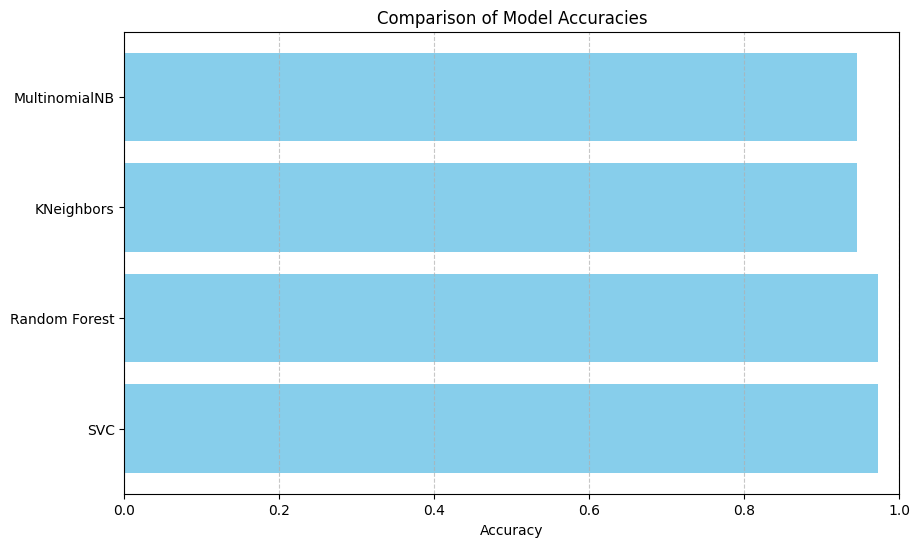

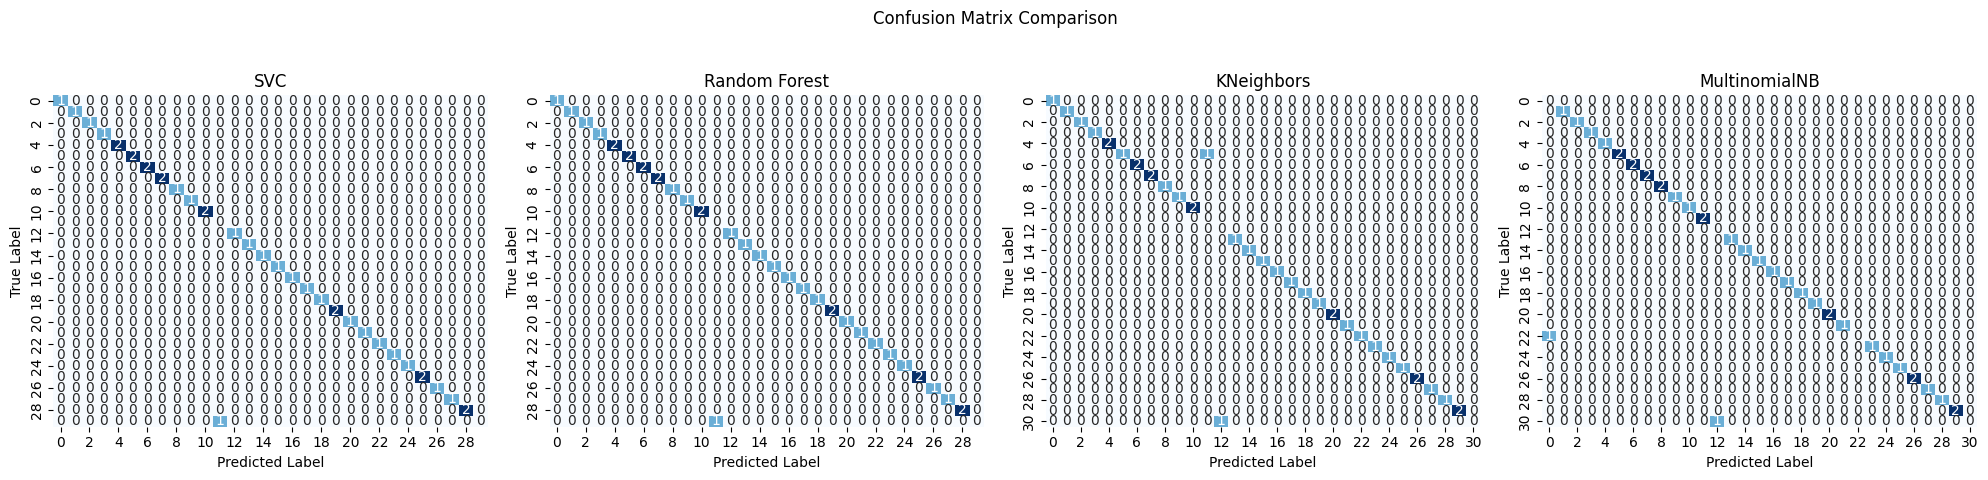

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to collect results
accuracy_scores = []
confusion_matrices = []

# Evaluate each classifier, collect accuracy, and confusion matrix
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)
    
    # Test the model
    predictions = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append((name, accuracy))
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    confusion_matrices.append((name, cm))
    
    print(f"\n{name} Accuracy: {accuracy}")
    print(f"{name} Confusion Matrix:\n{cm}\n{'='*40}\n")

# Convert accuracy data to a format suitable for plotting
model_names, accuracies = zip(*accuracy_scores)

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.xlim(0, 1)  # Assuming accuracy is between 0 and 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Plot confusion matrix heatmaps
fig, axes = plt.subplots(nrows=1, ncols=len(confusion_matrices), figsize=(20, 5))
fig.suptitle("Confusion Matrix Comparison")

for ax, (name, cm) in zip(axes, confusion_matrices):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title
plt.show()


In [36]:
sd=pd.read_csv("datasets/description.csv")

In [37]:
sd.head()

,Disease,Description
0,Fungal infection,Fungal infection is a common skin condition ca...
1,Allergy,Allergy is an immune system reaction to a subs...
2,GERD,GERD (Gastroesophageal Reflux Disease) is a di...
3,Chronic cholestasis,Chronic cholestasis is a condition where bile ...
4,Drug Reaction,Drug Reaction occurs when the body reacts adve...


In [38]:
sp=pd.read_csv("datasets/precautions_df.csv")


In [39]:
sp.head()

,Unnamed: 0,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [40]:
d=pd.read_csv("datasets/diets.csv")
d.head()

,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."
4,Drug Reaction,"['Antihistamine Diet', 'Omega-3-rich foods', '..."


In [41]:
md=pd.read_csv("datasets/medications.csv")
md.head()

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."


In [42]:
import numpy as np

def pred_result(m, X, sd, sp, d, md):
    # Predict probabilities for each class
    proba = m.predict_proba(X)
    
    # Get the indices and probabilities of the top 5 classes
    top5_idx = np.argsort(proba[0])[-5:][::-1]
    top5_proba = np.sort(proba[0])[-5:][::-1]
    
    # Get the names of the top 5 diseases
    top5_diseases = y[top5_idx]

    # Store results in a dictionary
    result_dict = []

    # Loop over the top 5 predictions
    for i in range(5):
        disease = top5_diseases[i]
        probability = 1 * top5_proba[i]

        # Create a dictionary for the current disease
        disease_info = {
            "Disease Name": disease,
            "Probability": probability,
            "Disease Description": None,
            "Recommended Things to do at home": [],
            "Healthy Diet to Follow": [],
            "Recommended Medication": []
        }
        
        # Get Disease Description if available
        if disease in sd["Disease"].unique():
            disease_info["Disease Description"] = sd[sd['Disease'] == disease].iloc[0, 1]
        
        # Get Recommended Things to do at home if available
        if disease in sp["Disease"].unique():
            c = np.where(sp['Disease'] == disease)[0][0]
            precautions = sp.iloc[c, 1:].dropna().tolist()
            disease_info["Recommended Things to do at home"] = precautions
            
        # Get Healthy Diet to Follow if available
        if disease in d["Disease"].unique():
            c = np.where(d['Disease'] == disease)[0][0]
            diets = d.iloc[c, 1:].dropna().tolist()
            disease_info["Healthy Diet to Follow"] = diets
            
        # Get Recommended Medication if available
        if disease in md["Disease"].unique():
            c = np.where(md['Disease'] == disease)[0][0]
            medics = md.iloc[c, 1:].dropna().tolist()
            disease_info["Recommended Medication"] = medics  
        
        # Append this disease's information to the result dictionary
        result_dict.append(disease_info)
        
    # Print the results with spacing
    for result in result_dict:
        print(f"Disease Name: {result['Disease Name']}")
        print(f"Probability: {result['Probability']}")
        print(f"Disease Description: {result['Disease Description']}")
        print(f"Recommended Things to do at home: {result['Recommended Things to do at home']}")
        print(f"Healthy Diet to Follow: {result['Healthy Diet to Follow']}")
        print(f"Recommended Medication: {result['Recommended Medication']}")
        print("\n" + "-"*40 + "\n")  # Add space and separator line
    
    return result_dict


In [43]:
x = dfx.columns[1:] 
x = [symptom[1:] for symptom in x]  
x

['acidity',
 'back_pain',
 'bladder_discomfort',
 'breathlessness',
 'burning_micturition',
 'chest_pain',
 'chills',
 'constipation',
 'continuous_sneezing',
 'cough',
 'cramps',
 'fatigue',
 'headache',
 'high_fever',
 'indigestion',
 'joint_pain',
 'mood_swings',
 'muscle_wasting',
 'muscle_weakness',
 'neck_pain',
 'pain_during_bowel_movements',
 'patches_in_throat',
 'pus_filled_pimples',
 'shivering',
 'skin_rash',
 'stiff_neck',
 'stomach_pain',
 'sunken_eyes',
 'vomiting',
 'weakness_in_limbs',
 'weight_gain',
 'weight_loss',
 'yellowish_skin',
 'tching',
 'abdominal_pain',
 'acidity',
 'anxiety',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'breathlessness',
 'bruising',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'cough',
 'cramps',
 'dehydration',
 'dizziness',
 'fatigue',
 'foul_smell_of urine',
 'headache',
 'high_fever',
 'indigestion',
 'joint_pain',
 'knee_pain',
 'lethargy',
 'loss_of_appetite',
 'mood_swings',
 'nausea',
 'neck_pain',
 'nodal_skin_erupti

In [44]:
len(x)

394

In [45]:
x

['acidity',
 'back_pain',
 'bladder_discomfort',
 'breathlessness',
 'burning_micturition',
 'chest_pain',
 'chills',
 'constipation',
 'continuous_sneezing',
 'cough',
 'cramps',
 'fatigue',
 'headache',
 'high_fever',
 'indigestion',
 'joint_pain',
 'mood_swings',
 'muscle_wasting',
 'muscle_weakness',
 'neck_pain',
 'pain_during_bowel_movements',
 'patches_in_throat',
 'pus_filled_pimples',
 'shivering',
 'skin_rash',
 'stiff_neck',
 'stomach_pain',
 'sunken_eyes',
 'vomiting',
 'weakness_in_limbs',
 'weight_gain',
 'weight_loss',
 'yellowish_skin',
 'tching',
 'abdominal_pain',
 'acidity',
 'anxiety',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'breathlessness',
 'bruising',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'cough',
 'cramps',
 'dehydration',
 'dizziness',
 'fatigue',
 'foul_smell_of urine',
 'headache',
 'high_fever',
 'indigestion',
 'joint_pain',
 'knee_pain',
 'lethargy',
 'loss_of_appetite',
 'mood_swings',
 'nausea',
 'neck_pain',
 'nodal_skin_erupti

In [46]:
import pandas as pd
import numpy as np
import pickle

# Create a Series with all zeros, indexed by `x`
  # Example symptoms/features
t = pd.Series([0] * len(x), index=x)

# Load the pre-trained model
with open("Random Forest.pkl", 'rb') as f:
        m = pickle.load(f)


# Input symptoms with enhanced validation
while True:
    symptoms = input("Enter your symptoms (comma-separated): ").strip()
    if not symptoms:
        print("No symptoms entered. Please provide at least one symptom.")
        continue
    break

# Process the input
user_symptoms = [s.strip().lower() for s in symptoms.split(',') if s.strip()]

# Validate and map symptoms
valid_symptoms = [symptom for symptom in user_symptoms if symptom in x]
invalid_symptoms = [symptom for symptom in user_symptoms if symptom not in x]

# Inform about invalid symptoms
if invalid_symptoms:
    print(f"Invalid symptoms ignored: {', '.join(invalid_symptoms)}")

if not valid_symptoms:
    print("No valid symptoms provided. Please enter symptoms from the valid list:")
    print(f"Valid symptoms are: {', '.join(x)}")
    exit()

# Update the feature vector for valid symptoms
t.loc[valid_symptoms] = 1

# Convert t to a numpy array and reshape
t_array = t.to_numpy().reshape(1, -1)

# Predict using the loaded model
try:
    prediction = m.predict(t_array)
    print(f"Predicted condition: {prediction[0]}")
except Exception as e:
    print("An error occurred during prediction. Please ensure the input format and model compatibility.")
    print(f"Error details: {e}")
print(prediction)

Predicted condition: 4
[4]


Disease Name: Allergy
Probability: 0.35
Disease Description: Allergy is an immune system reaction to a substance in the environment.
Recommended Things to do at home: ['Allergy', 'apply calamine', 'cover area with bandage', 'use ice to compress itching']
Healthy Diet to Follow: ["['Elimination Diet', 'Omega-3-rich foods', 'Vitamin C-rich foods', 'Quercetin-rich foods', 'Probiotics']"]
Recommended Medication: ["['Antihistamines', 'Decongestants', 'Epinephrine', 'Corticosteroids', 'Immunotherapy']"]

----------------------------------------

Disease Name: Malaria
Probability: 0.21
Disease Description: Malaria is a mosquito-borne infectious disease affecting humans and other animals.
Recommended Things to do at home: ['Malaria', 'Consult nearest hospital', 'avoid oily food', 'avoid non veg food', 'keep mosquitos out']
Healthy Diet to Follow: ["['Malaria Diet', 'Hydration', 'High-Calorie Diet', 'Soft and bland foods', 'Oral rehydration solutions']"]
Recommended Medication: ["['Antimalarial

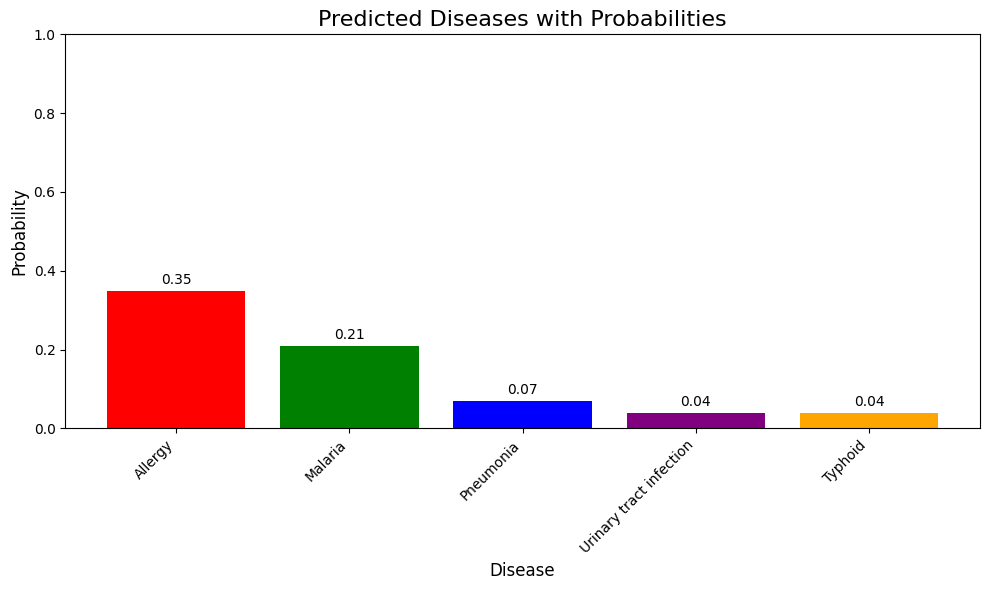

In [48]:
import matplotlib.pyplot as plt

# Data for diseases, their probabilities, and descriptions
# Call pred_result function
result_data = pred_result(m, t_array, sd, sp , d, md)

# Store the output in a variable `result_data`
# Now, use this data to plot the graph

# Extract disease names and probabilities from `result_data`
disease_names = [disease["Disease Name"] for disease in result_data]
probabilities = [disease["Probability"] for disease in result_data]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(disease_names, probabilities, color=['red', 'green', 'blue', 'purple', 'orange'])

# Adding titles and labels
plt.title("Predicted Diseases with Probabilities", fontsize=16)
plt.xlabel("Disease", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.ylim(0, 1)  # Set the Y-axis to range from 0 to 1 (probability range)

# Adding probability values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, 
             f"{bar.get_height():.2f}", ha='center', va='bottom', fontsize=10)

# Rotate x labels to make them more readable if they overlap
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()
